In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [4]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [5]:
train_data = pd.read_csv("C:/Users/Kishor J R/Downloads/titanic-task/dataset/train.csv")
test_data = pd.read_csv("C:/Users/Kishor J R/Downloads/titanic-task/dataset/test.csv")

In [6]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
train_data1= train_data
train_data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
train_data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
display(train_data1[train_data1['Embarked'].isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


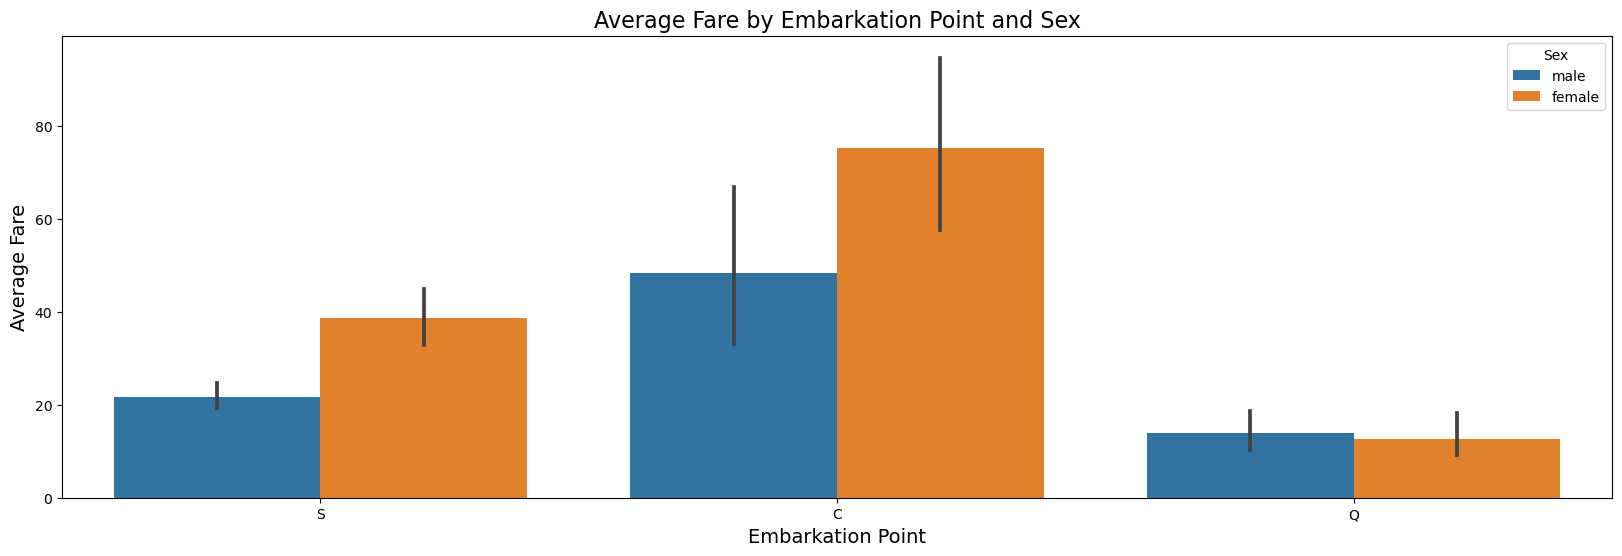

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 1, figsize=(20, 6))

sns.barplot(x="Embarked", y="Fare", hue="Sex", data=train_data1)
axes.set_title('Average Fare by Embarkation Point and Sex', fontsize=16)

axes.set_xlabel('Embarkation Point', fontsize=14)
axes.set_ylabel('Average Fare', fontsize=14)

plt.show()


### By Average fare from the plot - the passengers must be from embarkation point "C". (Also the ticket number of both passengers are same)

In [12]:
train_data1['Embarked'].fillna('C', inplace=True)

train_data1['Embarked'] = train_data1['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

groups = [['Pclass', 'Sex', 'Parch', 'SibSp'], ['Pclass', 'Sex', 'Parch'], ['Pclass', 'Sex']]
for group in groups:
    train_data1['Age'] = train_data1.groupby(group)['Age'].transform(lambda x: x.fillna(x.mean()))
train_data1['Age'] = train_data1['Age'].fillna(train_data1['Age'].mean())
train_data1['Cabin'].fillna('U', inplace=True)

train_data1['Title'] = train_data1['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_data1['Title'] = train_data1['Title'].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_data1['Title'] = train_data1['Title'].replace(['Mlle', 'Ms'], 'Miss').replace('Mme', 'Mrs')
train_data1['Title'] = train_data1['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})

train_data1['FamilySize'] = train_data1['SibSp'] + train_data1['Parch'] + 1

train_data1['Alone'] = (train_data1['FamilySize'] == 1).astype(int)

train_data1['Child'] = (train_data1['Age'] < 18).astype(int)

train_data1['Cabin'] = train_data1['Cabin'].str[:1]

cabin_mapping = {cabin: i for i, cabin in enumerate(set(train_data1['Cabin']))}

train_data1['Cabin'] = train_data1['Cabin'].map(cabin_mapping)

train_data1['TicketSurvivor'] = 0

ticket_counts = train_data1['Ticket'].value_counts().to_dict()

for ticket, count in ticket_counts.items():
    if count > 1:
        survivors = train_data1['Survived'][train_data1['Ticket'] == ticket].sum()
        if survivors > 0:
            train_data1.loc[train_data1['Ticket'] == ticket, 'TicketSurvivor'] = 1

train_data1 = train_data1.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

train_data1['Sex'] = train_data1['Sex'].map({'male': 0, 'female': 1})


train_data1.head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,Alone,Child,TicketSurvivor
0,0,3,0,22.000000,1,0,7.2500,4,0,1,2,0,0,0
1,1,1,1,38.000000,1,0,71.2833,3,1,3,2,0,0,0
2,1,3,1,26.000000,0,0,7.9250,4,0,2,1,1,0,0
3,1,1,1,35.000000,1,0,53.1000,3,0,3,2,0,0,1
4,0,3,0,35.000000,0,0,8.0500,4,0,1,1,1,0,0
5,0,3,0,29.184492,0,0,8.4583,4,2,1,1,1,0,0
6,0,1,0,54.000000,0,0,51.8625,8,0,1,1,1,0,0
7,0,3,0,2.000000,3,1,21.0750,4,0,4,5,0,1,0
8,1,3,1,27.000000,0,2,11.1333,4,0,3,3,0,0,1
9,1,2,1,14.000000,1,0,30.0708,4,1,3,2,0,1,1


In [13]:
train_df = train_data1.copy()
X = train_df.drop(['Survived'], axis = 1)
Y = train_df['Survived']

sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X.values), index=X.index, columns=X.columns)
    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,Alone,Child,TicketSurvivor
331,-1.566107,-0.737695,1.181540,-0.474545,-0.473674,-0.074583,-0.618235,-0.571933,-0.707550,-0.560975,0.811922,-0.405840,-0.596795
733,-0.369365,-0.737695,-0.483367,-0.474545,-0.473674,-0.386671,0.108477,-0.571933,-0.707550,-0.560975,0.811922,-0.405840,-0.596795
382,0.827377,-0.737695,0.182596,-0.474545,-0.473674,-0.488854,0.108477,-0.571933,-0.707550,-0.560975,0.811922,-0.405840,-0.596795
704,0.827377,-0.737695,-0.261380,0.432793,-0.473674,-0.490280,0.108477,-0.571933,-0.707550,0.059160,-1.231645,-0.405840,-0.596795
813,0.827377,1.355574,-1.741297,3.154809,2.008933,-0.018709,0.108477,-0.571933,0.263832,3.159833,-1.231645,2.464027,-0.596795


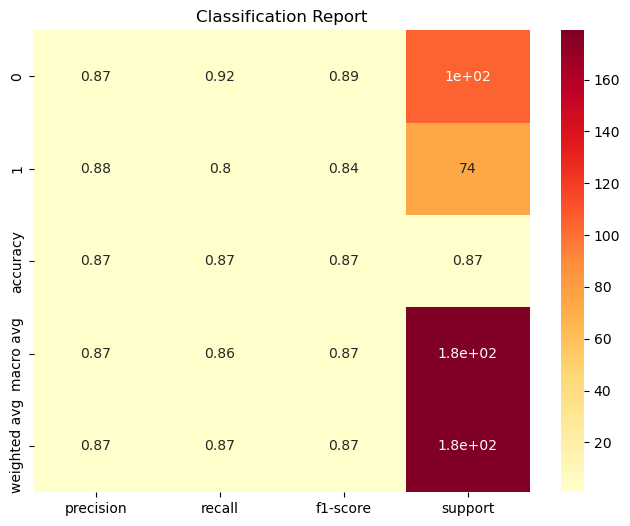


Final Prediction of Survivors:
      PassengerId  Survived
0              1         0
1              2         1
2              3         1
3              4         1
4              5         0
..           ...       ...
886          887         0
887          888         1
888          889         0
889          890         0
890          891         0

[891 rows x 2 columns]


In [14]:
lg = LogisticRegression(solver='lbfgs', random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(C=1.0, gamma=0.1, kernel='rbf', probability=True, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)

classifier = VotingClassifier(estimators=[
    ('lg', lg), 
    ('rf', rf), 
    ('svm', SVC(C=1.0, gamma=0.1, kernel='rbf', probability=True, random_state=42)),
    ('gb', gb), 
    ('xgb', xgb_model)
], voting='soft')

classifier.fit(X_train, Y_train)

test_predictions = classifier.predict(X_test)

test_accuracy = accuracy_score(Y_test, test_predictions)


plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(Y_test, test_predictions, output_dict=True)).T, annot=True, cmap='YlOrRd')
plt.title('Classification Report')
plt.show()
entire_dataset_predictions = classifier.predict(X)

passenger_ids_entire = train_data['PassengerId']
predictions_entire_df = pd.DataFrame({'PassengerId': passenger_ids_entire, 'Survived': entire_dataset_predictions})

print("\nFinal Prediction of Survivors:\n",predictions_entire_df)
warnings.filterwarnings('default', category=FutureWarning)